# Comparing Texts

## Imports

In [1]:
# packages
import pandas as pd
import matplotlib as plt
import nltk
import spacy
from nltk.probability import FreqDist

In [2]:
# load data
df = pd.read_csv('Data/Fake_Real_News_Data.csv')

In [3]:
# preview data
df.head()

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
# check for missing values
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

0

## 1. Clean the Data

In [7]:
# drop unnecessary columns
df = df.drop(columns='Unnamed: 0')

In [8]:
# verify changes
df.head()

,title,text,label
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [9]:
df['lower_text'] = df['text'].str.lower()
df.head()

,title,text,label,lower_text
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...


## 2. Prepare the Data

### Create Tokens

In [10]:
df['tokens'] = df['lower_text'].str.split()
df.head()

,title,text,label,lower_text,tokens
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com..."


### Create Lemmas

In [11]:
# load spacy model with parser and ner disabled
nlp_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# verify parser and ner not loaded
nlp_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [12]:
## [V1 List Comp] Define a function to use spacy to process our text
def spacy_process(text):
        """Lemmatize tokens, lower case, remove punctuation, spaces, and stop words"""
        doc = nlp_model(text)
        processed_doc = [token.lemma_.lower() for token in doc if not token.is_punct and 
                         not token.is_space and not token.is_stop and 
                         not 'http' in token.lemma_.lower() and 'www' not in token.lemma_.lower()]
        return processed_doc

In [13]:
## process the text using the spacy function
df['spacy_lemmas'] = df['text'].apply(spacy_process)
df.head()

,title,text,label,lower_text,tokens,spacy_lemmas
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo...","[trump, proudly, declare, people, insult, dese..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com...","[notable, name, include, ray, washburne, comme..."


## 3. Joined lemmatized data

### join each lemmatized document into a single string.

In [14]:
# Join list of lemmas into a string with spaces between each lemma
df['lemmas-joined'] = df['spacy_lemmas'].map(lambda x: " ".join(x))

In [15]:
# verify changes
df.head()

,title,text,label,lower_text,tokens,spacy_lemmas,lemmas-joined
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter...",donald trump endorse unabashedly noninterventi...
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari...",justice department investigation adversarial n...
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo...","[trump, proudly, declare, people, insult, dese...",trump proudly declare people insult deserved a...
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob...",donald trump spend day january 2014 hobnob pol...
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com...","[notable, name, include, ray, washburne, comme...",notable name include ray washburne commerce da...


## Analyze class balance and document lengths:

### 1. What is the class balance? How many real and fake articles are there?

In [16]:
# normalized class balance
df['label'].value_counts(normalize=True)

REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64

In [17]:
# raw value count of real vs. fake articles
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

### 2. What is the average word count for real news articles? What about fake ones?

In [18]:
# map the len() function to the tokenized text to create a new column
df['words'] = list(map(len, df['tokens']))

In [19]:
# verify changes
df.head()

,title,text,label,lower_text,tokens,spacy_lemmas,lemmas-joined,words
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter...",donald trump endorse unabashedly noninterventi...,1428
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari...",justice department investigation adversarial n...,1091
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo...","[trump, proudly, declare, people, insult, dese...",trump proudly declare people insult deserved a...,408
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob...",donald trump spend day january 2014 hobnob pol...,1959
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com...","[notable, name, include, ray, washburne, comme...",notable name include ray washburne commerce da...,19


In [20]:
real_df = df[df['label'] == 'REAL'] 

In [21]:
# average word count of real articles
real_df['words'].mean()

873.2576474298329

In [22]:
fake_df = df[df['label'] == 'FAKE'] 

In [23]:
# average word count of fake articles
fake_df['words'].mean()

679.1292667509482

## Compare the word frequencies:

### 1. Create and plot the frequency distribution plots for the 20 most common words in real and fake news articles. (2 total plots)
    Use the lemmatized text (spacy_lemmas)

In [75]:
# preview data
real_lemmas = real_df['spacy_lemmas']
real_lemmas.count()

3171

In [78]:
# concatenate all lists of real lemmas
real_results = []
for x in real_lemmas:
    x=0
    if x == 3171:
        break
    real_results = real_results+real_lemmas[x]
    x=x+1

In [79]:
real_results

['donald',
 'trump',
 'endorse',
 'unabashedly',
 'noninterventionist',
 'approach',
 'world',
 'affair',
 'monday',
 'day',
 'long',
 'tour',
 'washington',
 'cast',
 'doubt',
 'need',
 'north',
 'atlantic',
 'treaty',
 'organization',
 'express',
 'skepticism',
 'muscular',
 'u.s.',
 'military',
 'presence',
 'asia',
 'foreign',
 'policy',
 'position',
 'outline',
 'meeting',
 'editorial',
 'board',
 'washington',
 'post',
 'come',
 'day',
 'trump',
 'set',
 'aside',
 'guerrilla',
 'tactic',
 'showman',
 'bravado',
 'power',
 'campaign',
 'appear',
 'presidential',
 'nominee',
 'explain',
 'policy',
 'accept',
 'counsel',
 'build',
 'bridge',
 'republican',
 'elite',
 'monday',
 'night',
 'trump',
 'deliver',
 'scripted',
 'address',
 'american',
 'israel',
 'public',
 'affairs',
 'committee',
 'prompt',
 'ovation',
 'pledge',
 'stand',
 'israel',
 'hard',
 'line',
 'peace',
 'talk',
 'palestinians',
 'trump',
 'whirlwind',
 'day',
 'appearance',
 'nation',
 'capital',
 'intend',
 'h

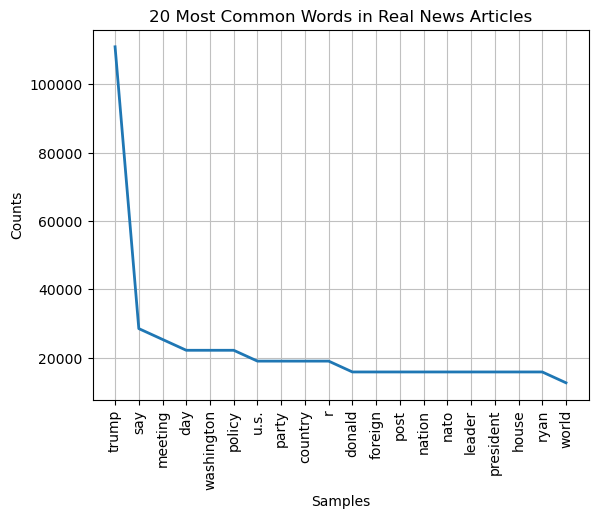

In [80]:
# Pass the tokenized lemmas to the class constructor and plot the distribution 
low_dist = FreqDist(real_results)
ax = low_dist.plot(20, show = False, title='20 Most Common Words in Real News Articles');

In [75]:
# preview data
_lemmas = real_df['spacy_lemmas']
real_lemmas.count()

3171

In [78]:
# concatenate all lists of real lemmas
real_results = []
for x in real_lemmas:
    x=0
    if x == 3171:
        break
    real_results = real_results+real_lemmas[x]
    x=x+1

In [79]:
real_results

['donald',
 'trump',
 'endorse',
 'unabashedly',
 'noninterventionist',
 'approach',
 'world',
 'affair',
 'monday',
 'day',
 'long',
 'tour',
 'washington',
 'cast',
 'doubt',
 'need',
 'north',
 'atlantic',
 'treaty',
 'organization',
 'express',
 'skepticism',
 'muscular',
 'u.s.',
 'military',
 'presence',
 'asia',
 'foreign',
 'policy',
 'position',
 'outline',
 'meeting',
 'editorial',
 'board',
 'washington',
 'post',
 'come',
 'day',
 'trump',
 'set',
 'aside',
 'guerrilla',
 'tactic',
 'showman',
 'bravado',
 'power',
 'campaign',
 'appear',
 'presidential',
 'nominee',
 'explain',
 'policy',
 'accept',
 'counsel',
 'build',
 'bridge',
 'republican',
 'elite',
 'monday',
 'night',
 'trump',
 'deliver',
 'scripted',
 'address',
 'american',
 'israel',
 'public',
 'affairs',
 'committee',
 'prompt',
 'ovation',
 'pledge',
 'stand',
 'israel',
 'hard',
 'line',
 'peace',
 'talk',
 'palestinians',
 'trump',
 'whirlwind',
 'day',
 'appearance',
 'nation',
 'capital',
 'intend',
 'h

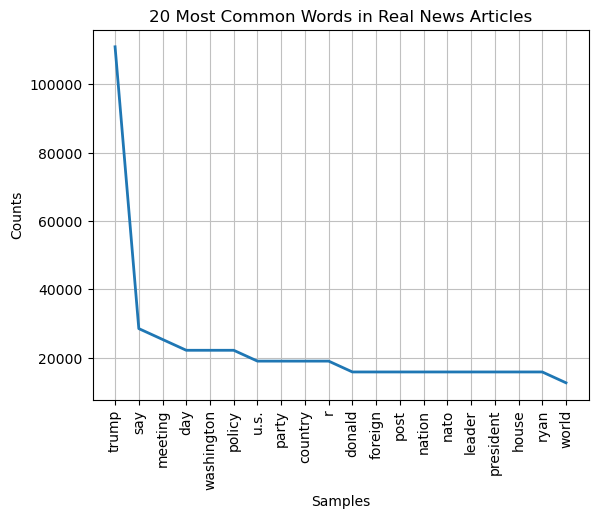

In [80]:
# Pass the tokenized lemmas to the class constructor and plot the distribution 
low_dist = FreqDist(real_results)
ax = low_dist.plot(20, show = False, title='20 Most Common Words in Real News Articles');

### 2. Create word clouds for each of the article types, real and fake (2 total word clouds)
    Use the joined lemmatized text (lemmas-joined)